# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 2.2: Modelling Techniques

### 2.2.2 ARIMA

In this module we will introduce ARIMA, an improvement over the ARMA model we reviewed in a past module (1.6.4). We will quickly review the key parts of ARMA as we build to the new ARIMA model:


### Autoregressive Model (AR)

The autoregressive model is used for predicting the value of a variable in a time series. We use the annotation $AR(p)$ for an autoregressive model with $p$ periods.

$AR(p) X_t = c + \sum_{i=1}^p{\beta_i X_{t-i}} + u_t$

We can simplify in the case of an AR(1) model, that is $p=1$. This simplifies further if we also assume a zero mean (which can be done by demeaning the data beforehand, giving $c=0$) and an error term $u$ that is white noise:

$AR(1) = \beta X_{t-1}$

### Moving Average (MA)

A Moving Average (MA) model is given as:

$MA(q) X_t = \mu + \epsilon_{t} + \sum_{i=1}^{q}\theta_i\epsilon_{t-i}$

and specifically the MA(1) process as:

$MA(1)X_t = \epsilon_t + \theta \epsilon_{t-1}$

Here, the values $\epsilon_t$ are the error terms for a given time step $t$ and $\mu$ is the average of the values of $X$.


### ARMA model

The ARMA model is a combination of both the AR model and the MA. It is quite a simple combination - we just concatenate the models, but the training of the model does become more complicated. 

An $ARMA(p, q)$ model, where $p$ is the lag in the autoregressive model and $q$ is the lag in the moving-average model, given as:

$X_t = c + \epsilon_t + \sum_{i=1}^{p}{\beta_i X_{t-i}} + \sum_{i=1}^{q}\theta_i\epsilon_{t-i}$

#### Extended Exercise

It is often argued that cryptocurrency prices for non-Bitcoin coins "follow" Bitcoin, i.e. they lag. Test this hypothesis on a daily level by checking if the values for Ethereum (ETH) and Ripple (XRP) can be modelled using a ARMA model. Test different values for p and q and find the best model.

You can get daily prices from Quandl, via BITFINEX: https://www.quandl.com/data/BITFINEX-Bitfinex

You can review module 1.6.4 for code on how to run the ARMA model in statsmodels.

In [6]:
%run setup.ipy
import quandl
import my_secrets

# configure api
quandl.ApiConfig.api_key = my_secrets.QUANDL_API_KEY

# download data according to instructed exchange
xrp = quandl.get("BITFINEX/XRPUSD")
eth = quandl.get("BITFINEX/ETHUSD")

# get only closing price
xrp = xrp["Last"]
eth = eth["Last"]

# match the lengths of data
eth = eth.iloc[-xrp.shape[0]:]

# view
print(xrp.shape)
print(eth.shape)

print(xrp.tail())
print(eth.tail())

(2021,)
(2021,)
Date
2023-01-02    0.34891
2023-01-03    0.34410
2023-01-04    0.34802
2023-01-05    0.33845
2023-01-06    0.34501
Name: Last, dtype: float64
Date
2023-01-02    1215.5
2023-01-03    1215.7
2023-01-04    1256.3
2023-01-05    1251.8
2023-01-06    1271.2
Name: Last, dtype: float64


In [9]:
# using code from 1.6.4
from statsmodels.tsa import stattools
from statsmodels import api as sms

xrp_pq = stattools.arma_order_select_ic(xrp) 
p, q = xrp_pq.bic_min_order
xrp_model = sms.tsa.ARIMA(xrp, order=(p, 0, q))
xrp_out = xrp_model.fit()

eth_pq = stattools.arma_order_select_ic(eth) 
p, q = eth_pq.bic_min_order
eth_model = sms.tsa.ARIMA(eth, order=(p, 0, q))
eth_out = eth_model.fit()

print(xrp_out.summary())
print(eth_out.summary())

c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

                               SARIMAX Results                                
Dep. Variable:                   Last   No. Observations:                 2021
Model:                 ARIMA(4, 0, 0)   Log Likelihood                3260.221
Date:                Sat, 07 Jan 2023   AIC                          -6508.441
Time:                        20:36:21   BIC                          -6474.773
Sample:                             0   HQIC                         -6496.086
                               - 2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4924      0.131      3.750      0.000       0.235       0.750
ar.L1          1.1480      0.007    155.199      0.000       1.133       1.162
ar.L2         -0.2269      0.012    -18.610      0.0

c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


*For solutions, see `solutions/arma_cryptocurrency.py`*

### The ARIMA model

One of the issues with the ARMA model is that it requires data to be stationary before the algorithm begins. A normal step for turning non-stationary data into stationary data is to difference the data, either once or twice. Therefore, a normal process is to difference the data and then run ARMA. A problem with this is that we have a two step methodology to describe. ARIMA captures this idea in a single model.

The ARIMA model is a more general form of the ARMA model. Specifically, ARMA(p, q) is an ARIMA(p, 0, q) model. The $p$ and $q$ values are the same as the ARMA model. The middle parameter is $d$, for differencing. The ARIMA model will apply differencing to turn a non-stationary dataset into a stationary one, allowing the AR and MA processes to model them better. That's the same as our two step process above, just captured nicely. And a lot more useful.

That gives the full ARIMA model as:

$ARIMA(p, d, q)$

where $p$ is the lag in the autoregressive model and $q$ is the lag in the moving-average model, and $d$ is the order of differencing applied (i.e. how many times to difference the data to get a stationary series).

The ARIMA model can also be identified by having components "turned off", i.e. set to zero. We saw above that ARIMA(p, 0, q) is simply the ARMA(p, q) model. Further, ARIMA(0, 0, q) is simply MA(q). ARIMA(0, 1, 1) is IMA(1, 1), although that is more obscure than other variants you'll see.

#### Exercise

1. What can the ARIMA(1, 0, 0) model also be known as?
    - Autoregressive(1) model with p = 1, d = 0, q = 0
2. What does an ARIMA(0, 0, 0) model actually model? Hint: use the ARMA equation, and set p and q to zero.
    - Constant (c) plus error (epsilon) with all the other terms being 0
    - This basically means a constant mean plus random noise
3. What does an ARIMA(0, 1, 0) model represent - i.e. what other term have we seen that refers to the same idea?
    - d is the number of times the raw observations are differenced; also known as the degree of differencing
    - d = 1 gives us a differened model (by 1)

*For solutions, see `solutions/arima_types.py`*

#### Extended Exercise

The ARIMA model is implemented in statsmodels under `statsmodels.tsa.arima_model.ARIMA` with a similar use case to the `ARMA` model previously used. Perform an ARIMA modelling on the cryptocurrency data from the previous exercise.

Normally, the value for $d$ is determined before running the model, but performing a test of stationarity. See Module 1.6.2 for information on performing these tests. Simply difference the data, check for stationarity, and if it isn't, difference it again. Values more than 3 are abnormal - if you still aren't getting stationary data at that point, check your assumptions.

In [10]:
# copy tests from previous module for testing if series are stationary
from statsmodels.tsa.stattools import kpss
_, p_value, _, _ = kpss(xrp)
print("XRP p_value:", p_value)
_, p_value, _, _ = kpss(eth)
print("ETH p_value:", p_value)

# copy code from above, except change to d = 1
xrp_pq = stattools.arma_order_select_ic(xrp) 
p, q = xrp_pq.bic_min_order
xrp_model2 = sms.tsa.ARIMA(xrp, order=(p, 1, q))
xrp_out2 = xrp_model2.fit()

eth_pq = stattools.arma_order_select_ic(eth) 
p, q = eth_pq.bic_min_order
eth_model2 = sms.tsa.ARIMA(eth, order=(p, 1, q))
eth_out2 = eth_model2.fit()

print(xrp_out2.summary())
print(eth_out2.summary())

c:\env\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
c:\env\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


XRP p_value: 0.01
ETH p_value: 0.01


c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

                               SARIMAX Results                                
Dep. Variable:                   Last   No. Observations:                 2021
Model:                 ARIMA(4, 1, 0)   Log Likelihood                3251.387
Date:                Sat, 07 Jan 2023   AIC                          -6492.774
Time:                        21:52:40   BIC                          -6464.719
Sample:                             0   HQIC                         -6482.478
                               - 2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1539      0.008     19.280      0.000       0.138       0.170
ar.L2         -0.0711      0.009     -8.293      0.000      -0.088      -0.054
ar.L3          0.1536      0.007     21.755      0.0

c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


*For solutions, see `solutions/arima_cryptocurrency.py`*

### Choosing parameters

When choosing parameters for the ARIMA model, the normal rule of thumb is "keep them small". Robert Nau summarised this as:

<i>In most cases either p is zero or q is zero, and p+q is less than or equal to 3, so there aren’t very many terms on the right-hand-side of this equation</i>

<small>See https://people.duke.edu/~rnau/Notes_on_nonseasonal_ARIMA_models--Robert_Nau.pdf</small>

Galit Shmueli has some further insight into this problem in her video on YouTube: https://www.youtube.com/watch?v=0xHf-SJ9Z9U

When performing a grid search (in other words, "try all combinations of these values for the parameters") you can keep your search space small by trying 0, 1, 2 and 3 as the only options (and just 0, 1, 2 for $d$). If that model isn't sufficient, **and** you have a good theoretical reason for a different value. For seasonal change, for instance, if you suspect a yearly trend (this June's data will be dependent on last June's), then seasonal ARIMA is needed, which we will cover later in this module.

In [11]:
import quandl

In [12]:
from statsmodels import api as sms

In [13]:
employment = quandl.get("FRED/NROUST").diff().dropna()

In [14]:
changes = employment.diff().dropna()

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
# previous code depreciated so updated package
model = sms.tsa.ARIMA(changes, order=(1, 1, 1))

c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [37]:
results = model.fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  330
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1018.749
Date:                Sat, 07 Jan 2023   AIC                          -2031.498
Time:                        21:58:36   BIC                          -2020.110
Sample:                    07-01-1949   HQIC                         -2026.955
                         - 10-01-2031                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1947      0.028     -6.970      0.000      -0.249      -0.140
ma.L1         -1.0000      1.051     -0.951      0.342      -3.060       1.061
sigma2         0.0001      0.000      0.953      0.341      -0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             20420.85
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):            2019.58   Skew:                            -1.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Exercise

Play around with the values for order and test out several types. How does the summary results change? What extra variables are added? How are they added, for instance, when you set $p=2$?

Note: There are no solutions for this exercise - just try different values and examine the result.

In [35]:
model = sms.tsa.ARIMA(changes, order = (2, 1, 1))
results2 = model.fit()
print(results2.summary())

# when p = 2, ar.L2 is added, an extra coefficient
# increasing d increseas heteroskedasticity
# increasing p/q increases number of coefficients

c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  330
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1012.164
Date:                Sat, 07 Jan 2023   AIC                          -2016.328
Time:                        21:58:28   BIC                          -2001.144
Sample:                    07-01-1949   HQIC                         -2010.270
                         - 10-01-2031                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2934      0.033     -8.767      0.000      -0.359      -0.228
ar.L2         -0.0244      0.034     -0.707      0.480      -0.092       0.043
ma.L1         -0.8283      0.024    -35.025      0.0

### Testing your ARIMA model

With your ARIMA model, you can test the residuals of the model to confirm they are white noise, or whether there is an additional correlation in the residuals that needs to be modelled. The Ljung-Box tests the following hypotheses:

$H_0$: The data are independently distributed

$H_A$: The data is not independently distributed, that is that they have a serial correlation.

Such a serial correlation indicates that the ARIMA model hasn't done its job well, indicative of a bad choice of parameters for $p$ and $q$, mainly $q$.

The test itself is:

$Q = n(n + 2)\sum_{k=1}^{h}\frac{p^2}{n-k}$

Where $n$ is the size of the dataset, $h$ is the number of lags being tested

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [40]:
test_statistics, p_values = acorr_ljungbox(results.resid)

In [47]:
out = acorr_ljungbox(results.resid)
out["lb_pvalue"] > 0.05

1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: lb_pvalue, dtype: bool

#### Exercise

Review carefully these results, compared against the hypothesis stated for the Ljung-Box test. What are the results saying?

Hint: for documentation on the function itself, see https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

In [48]:
# for lags of 1 and 2 (> 0.05), we can reject that the data is independently distributed
# we can say that there is indeed a correlation for the data in these lag periods

*For solutions, see `solutions/ljungbox.py`*

### Prediction with ARIMA

ARIMA models can be used for predicting future values. 
The prediction confidence interval from an ARIMA model will be wider for data with a higher volatility.

An ARIMA model is often harder to analyse than a simple Linear Regression model. For this reason, analysis of the fitted parameters (and meta-parameters, internal states of the model) are not often performed to understand "why" the model fit the way it did. Compare this to Linear Regression models, where we can interpret the $\beta$ values to understand why the model fit the way it did.

In [49]:
changes.tail()

,Value
Date,
2030-10-01,0.000026
2031-01-01,0.000039
2031-04-01,0.000048
2031-07-01,0.000051
2031-10-01,0.000042


In [50]:
changes["2000"]

C:\Users\86155\AppData\Local\Temp\ipykernel_12972\2320578269.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  changes["2000"]


,Value
Date,
2000-01-01,-0.000088
2000-04-01,-0.000089
2000-07-01,-0.000085
2000-10-01,-0.000069


In [51]:
# Predict values within the sample
from datetime import datetime

start_date = datetime(2000, 1, 1)
end_date = datetime(2001, 10, 1)

y_pred = results.predict(start_date, end_date)
y_pred.name = "Predictions"

In [52]:
%run setup.ipy

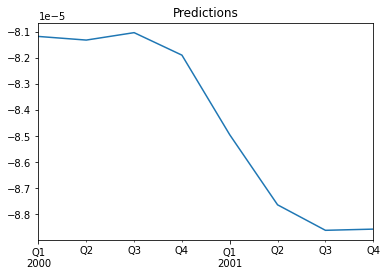

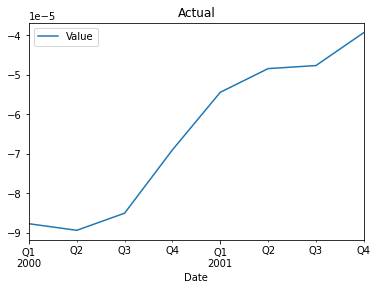

In [53]:
y_pred.plot(title="Predictions")
changes[start_date:end_date].plot(title="Actual");

In [54]:
# Perform out-of-sample prediction of data past the end of the data we have
y_new = results.forecast(steps=10)  # You can also use the predict method with a start/end date in the future:
# y_new = results.predict(len(changes), end=len(changes)+10, dynamic=True)

In [26]:
results.forecast?

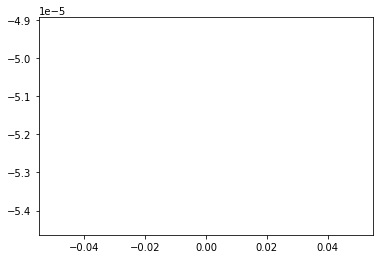

In [55]:
plt.plot(y_new[0])

#### Exercise

Compute the SSE value on the predicted values from 2015 onwards. Remember to retrain your model after doing a train/test split before you evaluate!

*For solutions, see `solutions/arima_sse.py`*

               Value
Date                
2030-10-01  0.000026
2031-01-01  0.000039
2031-04-01  0.000048
2031-07-01  0.000051
2031-10-01  0.000042


c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  330
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1010.595
Date:                Sat, 07 Jan 2023   AIC                          -2013.190
Time:                        22:14:57   BIC                          -1998.006
Sample:                    07-01-1949   HQIC                         -2007.133
                         - 10-01-2031                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3324      0.097     -3.442      0.001      -0.522      -0.143
ma.L1         -0.7440      0.100     -7.425      0.000      -0.940      -0.548
ma.L2          0.0009      0.101      0.009      0.9

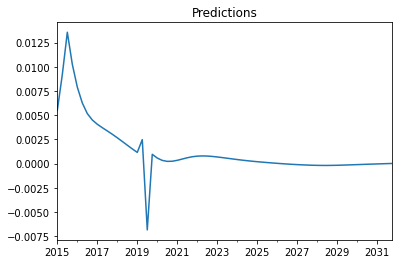

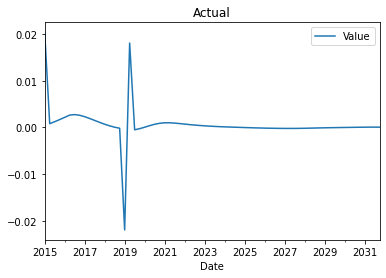

In [62]:
print(changes.tail())

# add cut off point for modelling
marker  = datetime(2015, 1, 1)
train, test = changes.loc[:marker], changes.loc[marker:]

# copy code from above for arima model
changes_pq = stattools.arma_order_select_ic(changes) 
p, q = changes_pq.bic_min_order
changes_model = sms.tsa.ARIMA(changes, order=(p, 1, q))
changes_out = changes_model.fit()

print(changes_out.summary())

# produce prediction
y_pred = changes_out.predict(marker, changes.index[-1])
y_pred.plot(title = "Predictions")
test.plot(title = "Actual")

# compute error
y_true = test["Value"] # Convert to a series to match our predicted data
sse = np.sum((y_true - y_pred)**2)
print("standard error " + str(sse))

### Seasonal ARIMA

Seasonal variations are not included by default in an ARIMA model. You can approximate this with lag periods of your season, for instance, setting $d=12$. A Seasonal ARIMA model has parameters for both the standard ARIMA model, and additional ones for the seasonality. This gives the full model as: 

$ARIMA(p, d, q)(P, D, Q)$

Alternatively you may see this model written as $ARIMA(p, d, q)x(P, D, Q)$.

Where $p$, $d$ and $q$ are as with ARIMA, and $P$, $D$, and $Q$ are the same as their lowercase version, except with a seasonal lag added in. For example,  D is seasonal lag, setting $y_t = y_t - y_{t-M}$ where $M$ is the seasonal lag period (if you have monthly data and want yearly differencing, $M=12$).

As with ARIMA, and all the model we have seen so far, any of these values could be zero, effectively turning that part of the model off. Unlike non-seasonal ARIMA, we normally still refer to the model by it's full name, i.e. ARIMA(0, 0, 1)(1, 1, 0), (as opposed to, say, MASAR(1, 1) or some weird combination).

In statsmodels, the name of this model is SARIMAX - Seasonal ARIMA, with eXogenous regressors (additional independent variables).

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
seasonal_model = SARIMAX(changes, order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))

c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [65]:
results = seasonal_model.fit()

c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  330
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 929.738
Date:                            Sat, 07 Jan 2023   AIC                          -1853.477
Time:                                    22:15:29   BIC                          -1842.125
Sample:                                07-01-1949   HQIC                         -1848.947
                                     - 10-01-2031                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3510      0.019    -18.353      0.000      -0.389      -0.314
ma.L1         -0.9992      0.085    -11.792      0.000      -1.165      -0.833
sigma2         0.0002   1.77e-05     10.583      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):              6677.17
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):            8732.68   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Exercise

1. Check the documentation for SARIMAX on the statsmodels website. These values were set in the previous code example?
2. Choose a seasonal commodity from Quandl, such as Wheat, and apply a Seasonal ARIMA to the data.

In [67]:
# qs 1
# above, we can see that the model is set with (0, 1, 0, 4), for (p, d, q, period)
# period = 4 as we have 4 seasons in a year

# qs 2
price = quandl.get("ODA/PWHEAMT_USD", collapse="monthly")
seasonal_price = SARIMAX(price, order = (1, 1, 1), seasonal_order = (0, 1, 0, 4))
result3 = seasonal_price.fit()
result3.summary()


c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  514
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood               -2170.178
Date:                            Sat, 07 Jan 2023   AIC                           4346.356
Time:                                    22:17:49   BIC                           4359.053
Sample:                                01-31-1980   HQIC                          4351.335
                                     - 10-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6143      0.022    -27.314      0.000      -0.658      -0.570
ma.L1          0.9995      0.077     13.014      0.000       0.849       1.150
sigma2       293.0192     23.414     12.515      0.000     247.129     338.909
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):               923.41
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               9.01   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*For solutions see `solutions/arima_seasonal.py`*

#### Extended Exercise Automating parameter selection

As we saw above, choosing parameters for ARIMA is a fairly straight-forward process, using AIC to choose the best from a subset of features. This process is easily automatable, and has been automated in a few libraries. In the R programming language, the ARIMA implementation already includes it, while it is a separate module for statsmodels in Python. You can get the code from https://github.com/tgsmith61591/pmdarima

Install the package on your system and run on the data you received for the exercises in this module (cryptocurrency and seasonal commodity). What parameters does it choose, and how effective was the algorithm?

As a warning, automated parameter selection is basically a brute force selection. Generally it composes the following steps:

1. Try all parameter combinations from those given
2. Evaluate all of them using some metric
3. Choose the best one.

Some algorithms exist separately to optimise and improve this process by being a bit more clever about their search, but these options are not available in `pmdarima`.

Further, the documenation for this library also contains additional information on choosing parameter bounds that is worth reading for a more complete picture of ARIMA.

In [71]:
# xrp data
result = stattools.arma_order_select_ic(xrp) 
print(result.bic_min_order)

# eth data
result = stattools.arma_order_select_ic(eth) 
print(result.bic_min_order)

# unemployment data
result = stattools.arma_order_select_ic(changes) 
print(result.bic_min_order)

# wheat data
result = stattools.arma_order_select_ic(price) 
print(result.bic_min_order)

c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0)


c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0)


c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

(1, 2)


c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


(1, 1)


c:\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
